# Exploratory Data Analysis in R

> use graphical and numerical techniques to begin uncovering the structure of your data

- author: Victor Omondi
- toc: true
- comments: true
- categories: [eda, r, data-analysis]
- image: images/eda-r-shield.png

# Overview

When a dataset is represented as a table or a database, it's difficult to observe much about it beyond its size and the types of variables it contains. We'll explore how to use graphical and numerical techniques to begin uncovering the structure of data. Which variables suggest interesting relationships? Which observations are unusual? We'll be able to answer these questions and more, while generating graphics that are both insightful and beautiful.

# Libraries

In [37]:
library(openintro)
library(readr)
library(ggplot2)
library(dplyr)

# Exploring Categorical Data

We will explore how to create graphical and numerical summaries of two categorical variables.

> ### Comics dataset
This is a collection of characteristics on all of the superheroes created by Marvel and DC comics in the last 80 years.

In [4]:
comics <- read_csv("datasets/comics.csv")
head(comics)

Parsed with column specification:
cols(
  name = col_character(),
  id = col_character(),
  align = col_character(),
  eye = col_character(),
  hair = col_character(),
  gender = col_character(),
  gsm = col_character(),
  alive = col_character(),
  appearances = col_double(),
  first_appear = col_character(),
  publisher = col_character()
)


name,id,align,eye,hair,gender,gsm,alive,appearances,first_appear,publisher
Spider-Man (Peter Parker),Secret,Good,Hazel Eyes,Brown Hair,Male,NA,Living Characters,4043,Aug-62,marvel
Captain America (Steven Rogers),Public,Good,Blue Eyes,White Hair,Male,NA,Living Characters,3360,Mar-41,marvel
"Wolverine (James \""Logan\"" Howlett)",Public,Neutral,Blue Eyes,Black Hair,Male,NA,Living Characters,3061,Oct-74,marvel
"Iron Man (Anthony \""Tony\"" Stark)",Public,Good,Blue Eyes,Black Hair,Male,NA,Living Characters,2961,Mar-63,marvel
Thor (Thor Odinson),No Dual,Good,Blue Eyes,Blond Hair,Male,NA,Living Characters,2258,Nov-50,marvel
Benjamin Grimm (Earth-616),Public,Good,Blue Eyes,No Hair,Male,NA,Living Characters,2255,Nov-61,marvel


> ### Working with factors

In [7]:
comics$align = as.factor(comics$align)
levels(comics$align)

[1] "Bad"                "Good"               "Neutral"           
[4] "Reformed Criminals"

In [8]:
comics$id = as.factor(comics$id)
levels(comics$id)

[1] "No Dual" "Public"  "Secret"  "Unknown"

In [9]:
table(comics$id, comics$align)

         
           Bad Good Neutral Reformed Criminals
  No Dual  474  647     390                  0
  Public  2172 2930     965                  1
  Secret  4493 2475     959                  1
  Unknown    7    0       2                  0

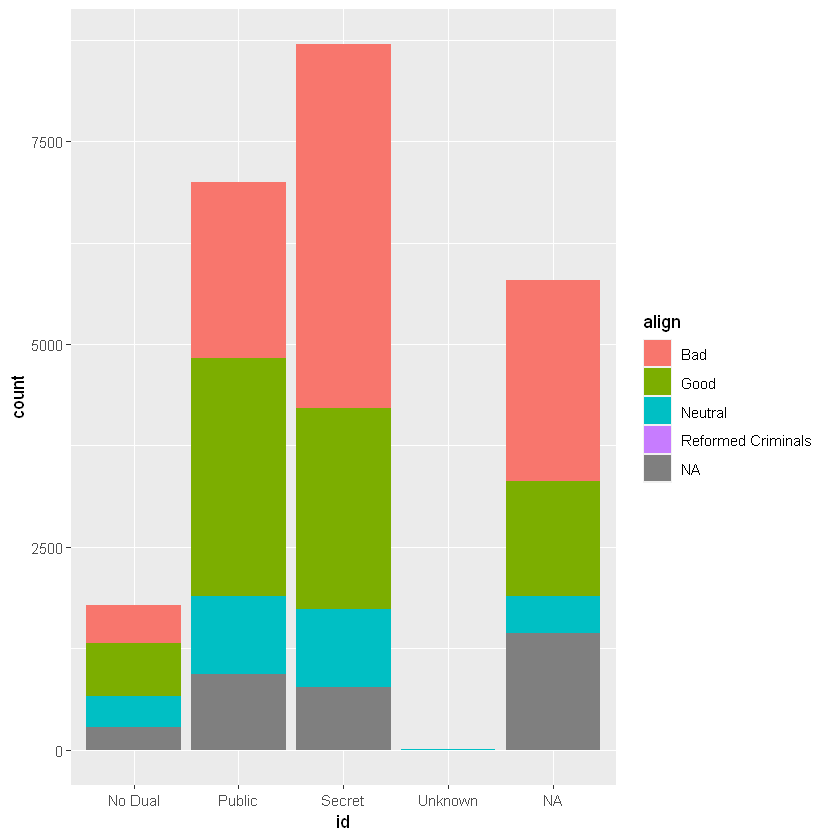

In [15]:
comics %>%
    ggplot(aes(x=id, fill=align)) +
        geom_bar()

In [21]:
str(comics)

tibble [23,272 x 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ name        : chr [1:23272] "Spider-Man (Peter Parker)" "Captain America (Steven Rogers)" "Wolverine (James \\\"Logan\\\" Howlett)" "Iron Man (Anthony \\\"Tony\\\" Stark)" ...
 $ id          : Factor w/ 4 levels "No Dual","Public",..: 3 2 2 2 1 2 2 2 2 2 ...
 $ align       : Factor w/ 4 levels "Bad","Good","Neutral",..: 2 2 3 2 2 2 2 2 3 2 ...
 $ eye         : chr [1:23272] "Hazel Eyes" "Blue Eyes" "Blue Eyes" "Blue Eyes" ...
 $ hair        : chr [1:23272] "Brown Hair" "White Hair" "Black Hair" "Black Hair" ...
 $ gender      : chr [1:23272] "Male" "Male" "Male" "Male" ...
 $ gsm         : chr [1:23272] NA NA NA NA ...
 $ alive       : chr [1:23272] "Living Characters" "Living Characters" "Living Characters" "Living Characters" ...
 $ appearances : num [1:23272] 4043 3360 3061 2961 2258 ...
 $ first_appear: chr [1:23272] "Aug-62" "Mar-41" "Oct-74" "Mar-63" ...
 $ publisher   : chr [1:23272] "marvel" "marvel" "marvel" "marv

In [23]:
comics$name = as.factor(comics$name)
comics$eye = as.factor(comics$eye)
comics$hair = as.factor(comics$hair)
comics$gender = as.factor(comics$gender)
comics$gsm = as.factor(comics$gsm)
comics$alive = as.factor(comics$alive)
comics$first_appear = as.factor(comics$first_appear)
comics$publisher = as.factor(comics$publisher)

str(comics)

tibble [23,272 x 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ name        : Factor w/ 23272 levels "'Spinner (Earth-616)",..: 19830 3335 22769 9647 20956 2220 17576 9347 18794 10957 ...
 $ id          : Factor w/ 4 levels "No Dual","Public",..: 3 2 2 2 1 2 2 2 2 2 ...
 $ align       : Factor w/ 4 levels "Bad","Good","Neutral",..: 2 2 3 2 2 2 2 2 3 2 ...
 $ eye         : Factor w/ 26 levels "Amber Eyes","Auburn Hair",..: 11 5 5 5 5 5 6 6 6 5 ...
 $ hair        : Factor w/ 28 levels "Auburn Hair",..: 7 27 3 3 4 14 7 7 7 4 ...
 $ gender      : Factor w/ 3 levels "Female","Male",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ gsm         : Factor w/ 6 levels "Bisexual Characters",..: NA NA NA NA NA NA NA NA NA NA ...
 $ alive       : Factor w/ 2 levels "Deceased Characters",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ appearances : num [1:23272] 4043 3360 3061 2961 2258 ...
 $ first_appear: Factor w/ 1606 levels "1935, October",..: 874 1278 1513 1296 1424 1432 1432 1364 1570 1432 ...
 $ publisher   : Factor w/ 2 level

In [24]:
# Check the levels of gender
levels(comics$gender)

[1] "Female" "Male"   "Other"

In [26]:
# Create a 2-way contingency table
(tab <- table(comics$gender, comics$align))

        
          Bad Good Neutral Reformed Criminals
  Female 1573 2490     836                  1
  Male   7561 4809    1799                  2
  Other    32   17      17                  0

### Dropping levels

The contingency table from the last exercise revealed that there are some levels that have very low counts. To simplify the analysis, it often helps to drop such levels.

this requires two steps: 
- first filtering out any rows with the levels that have very low counts, 
- then removing these levels from the factor variable with `droplevels()`. 

This is because the `droplevels()` function would keep levels that have just 1 or 2 counts; it only drops levels that don't exist in a dataset.

In [28]:
# Remove align level
comics_filtered <- comics %>%
  filter(align != "Reformed Criminals") %>%
  droplevels()
levels(comics_filtered$align)

[1] "Bad"     "Good"    "Neutral"

### Side-by-side barcharts

While a contingency table represents the counts numerically, it's often more useful to represent them graphically.

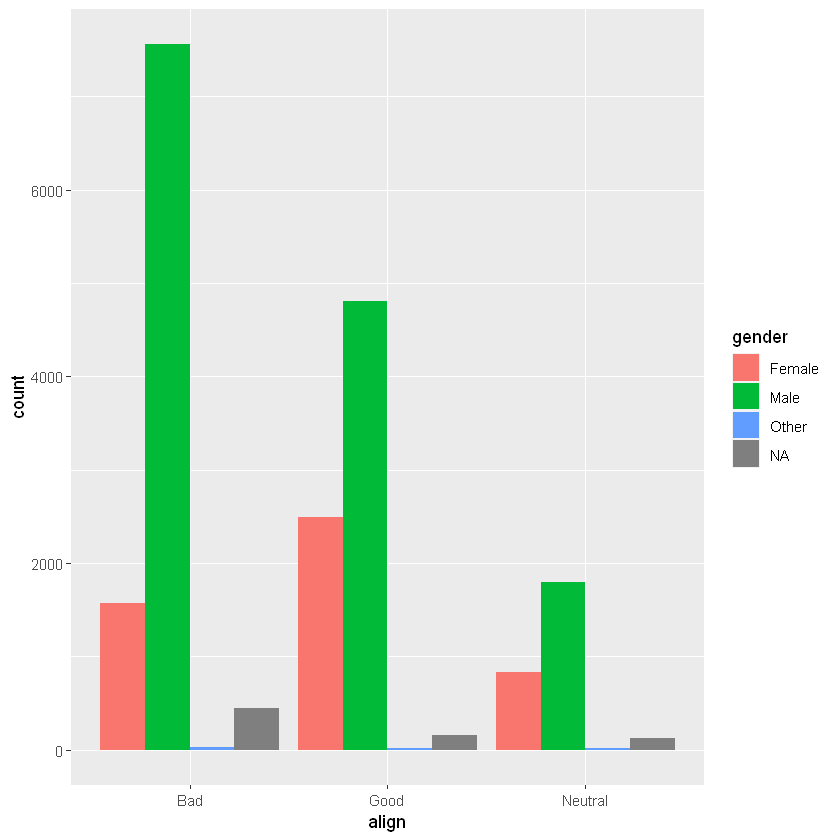

In [29]:
# Create side-by-side barchart of gender by alignment
comics_filtered %>%
    ggplot(aes(x = align, fill = gender)) + 
    geom_bar(position = "dodge")

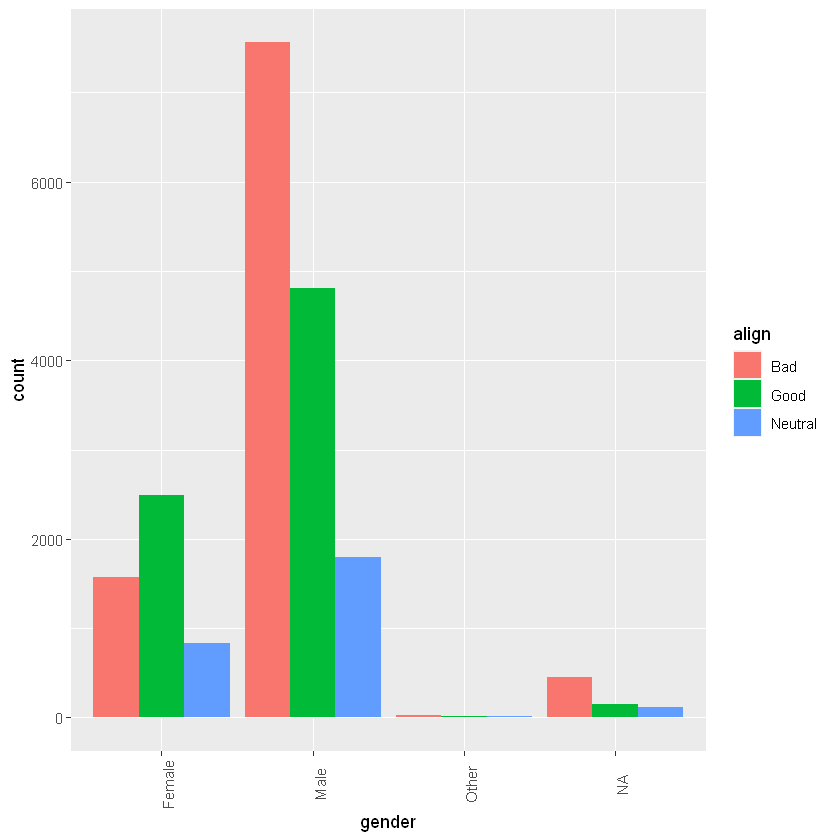

In [30]:
# Create side-by-side barchart of alignment by gender
comics_filtered %>%
    ggplot(aes(x = gender, fill = align)) + 
    geom_bar(position="dodge") +
    theme(axis.text.x = element_text(angle = 90))

- Among characters with "Neutral" alignment, males are the most common.
- In general, there is an association between gender and alignment.
- There are more male characters than female characters in this dataset.

## Counts vs. proportions

> ### From counts to proportions

In [31]:
# simplify display format
options(scipen = 999, digits = 3)
(tab <- table(comics_filtered$id, comics_filtered$align))

         
           Bad Good Neutral
  No Dual  474  647     390
  Public  2172 2930     965
  Secret  4493 2475     959
  Unknown    7    0       2

In [36]:
prop.table(tab)

         
               Bad     Good  Neutral
  No Dual 0.030553 0.041704 0.025139
  Public  0.140003 0.188862 0.062202
  Secret  0.289609 0.159533 0.061815
  Unknown 0.000451 0.000000 0.000129

In [38]:
sum(prop.table(tab))

[1] 1

> ### Conditional proportions

In [42]:
# Condition on the rows (i.e. rows sum to 1)
prop.table(tab, 1)

         
            Bad  Good Neutral
  No Dual 0.314 0.428   0.258
  Public  0.358 0.483   0.159
  Secret  0.567 0.312   0.121
  Unknown 0.778 0.000   0.222

In [43]:
# Condition on the columns (i.e. columns sum to 1)
prop.table(tab, 2)

         
               Bad     Good  Neutral
  No Dual 0.066331 0.106907 0.168394
  Public  0.303946 0.484137 0.416667
  Secret  0.628743 0.408956 0.414076
  Unknown 0.000980 0.000000 0.000864

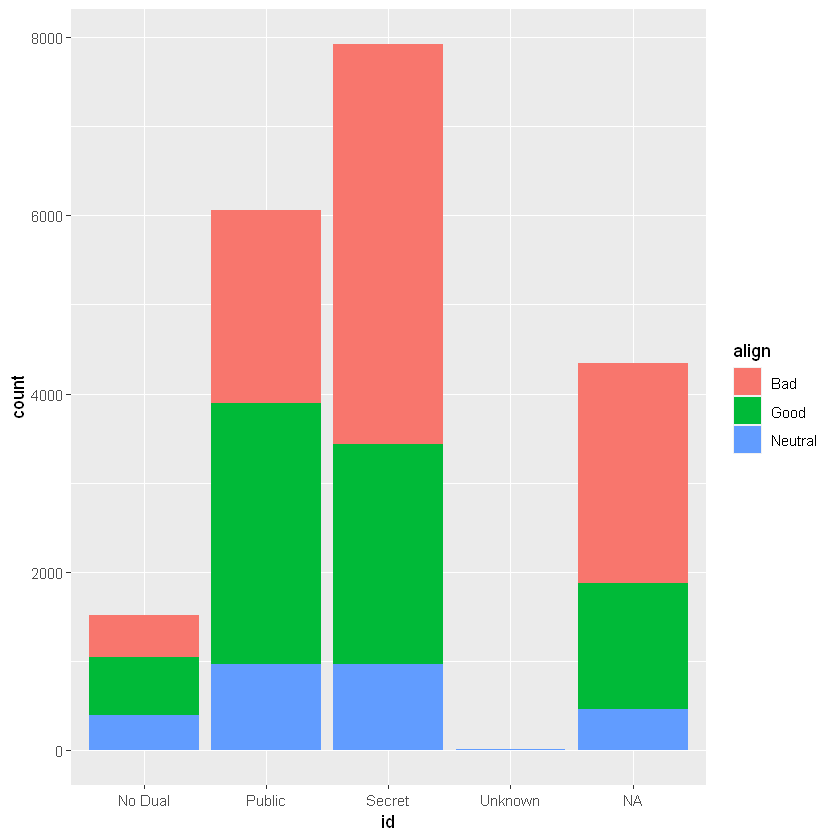

In [44]:
comics_filtered %>%
    ggplot(aes(x=id, fill=align)) +
    geom_bar()

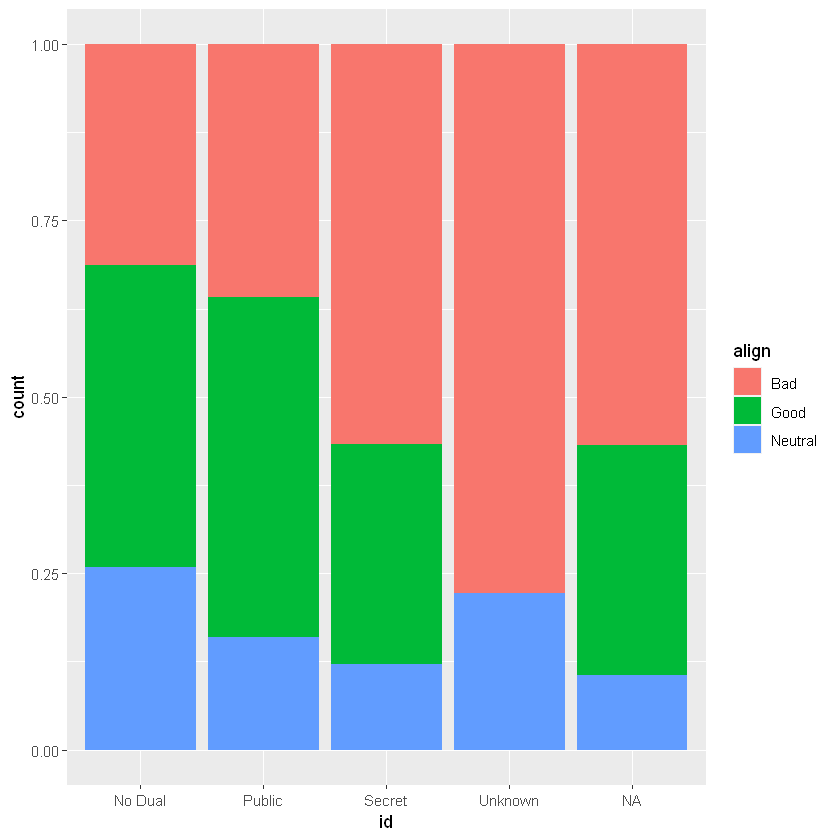

In [46]:
comics_filtered %>%
    ggplot(aes(x=id, fill=align)) +
    geom_bar(position = "fill")

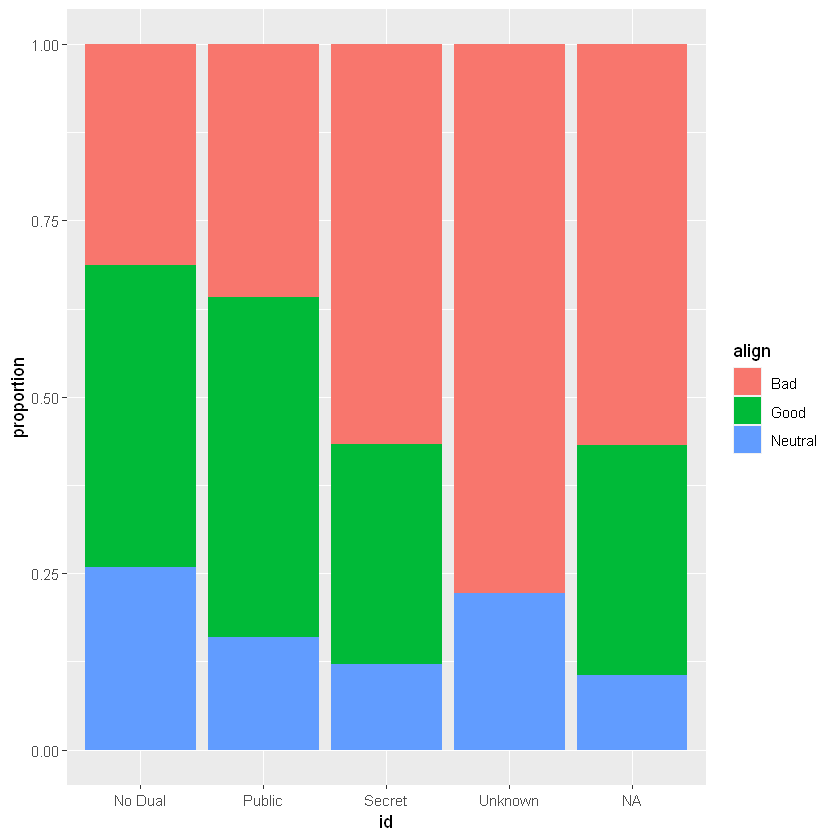

In [47]:
comics_filtered %>%
    ggplot(aes(x=id, fill=align)) +
    geom_bar(position="fill") +
    ylab("proportion")

By adding `position = "fill"` to `geom_bar()`, you are saying you want the bars to fill the entire height of the plotting window, thus displaying proportions and not raw counts.

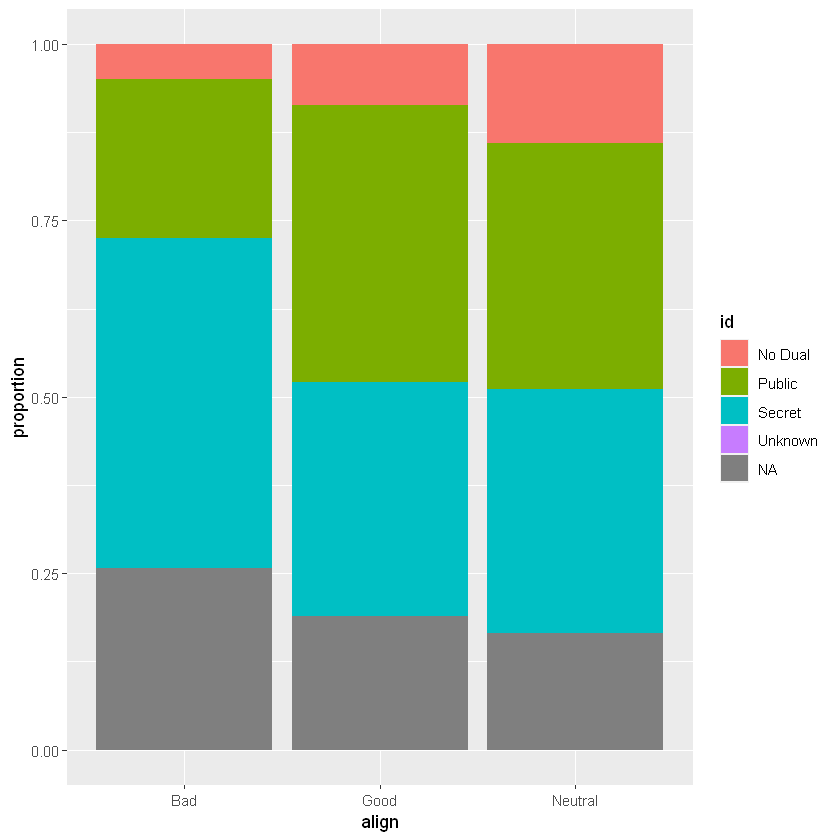

In [48]:
comics_filtered %>%
    ggplot(aes(x=align, fill=id)) +
    geom_bar(position="fill") +
    ylab("proportion")

In [49]:
(tab <- table(comics$align, comics$gender))

                    
                     Female Male Other
  Bad                  1573 7561    32
  Good                 2490 4809    17
  Neutral               836 1799    17
  Reformed Criminals      1    2     0

In [50]:
prop.table(tab)

                    
                        Female      Male     Other
  Bad                0.0821968 0.3950985 0.0016722
  Good               0.1301144 0.2512933 0.0008883
  Neutral            0.0436850 0.0940064 0.0008883
  Reformed Criminals 0.0000523 0.0001045 0.0000000

In [51]:
prop.table(tab, 2)

                    
                       Female     Male    Other
  Bad                0.321020 0.533554 0.484848
  Good               0.508163 0.339355 0.257576
  Neutral            0.170612 0.126949 0.257576
  Reformed Criminals 0.000204 0.000141 0.000000

Approximately 51% of all female characters are good?

### Counts vs. proportions (2)

Bar charts can tell dramatically different stories depending on whether they represent counts or proportions and, if proportions, what the proportions are conditioned on. To demonstrate this difference, we'll construct two barcharts one of counts and one of proportions.

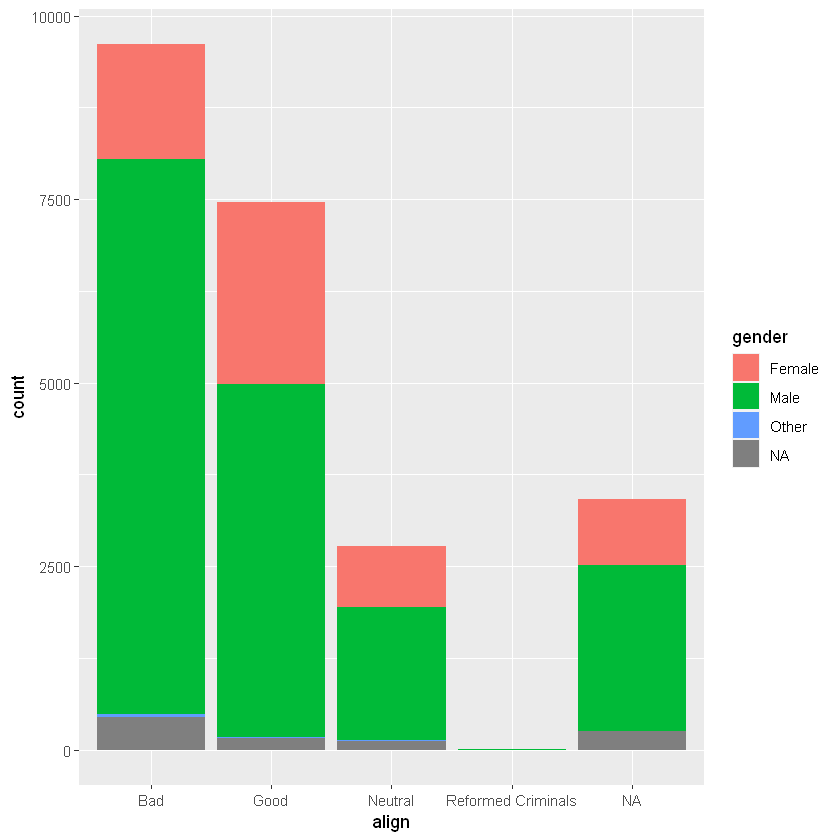

In [52]:
# Plot of gender by align
ggplot(comics, aes(x = align, fill = gender)) +
  geom_bar()

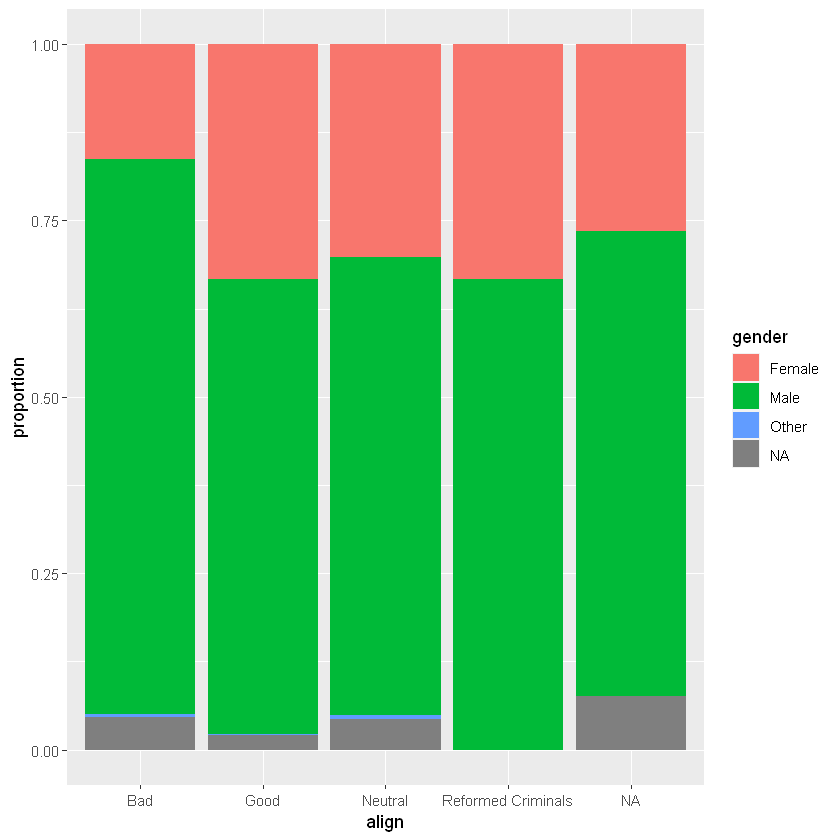

In [53]:
# Plot proportion of gender, conditional on align
ggplot(comics, aes(x = align, fill = gender)) + 
  geom_bar(position = "fill") +
  ylab("proportion")

## Distribution of one variable

> ### Marginal distribution

In [54]:
table(comics$id)


No Dual  Public  Secret Unknown 
   1788    6994    8698       9 

In [56]:
(tab <- table(comics_filtered$id, comics_filtered$align))

         
           Bad Good Neutral
  No Dual  474  647     390
  Public  2172 2930     965
  Secret  4493 2475     959
  Unknown    7    0       2

> ### Simple barchart

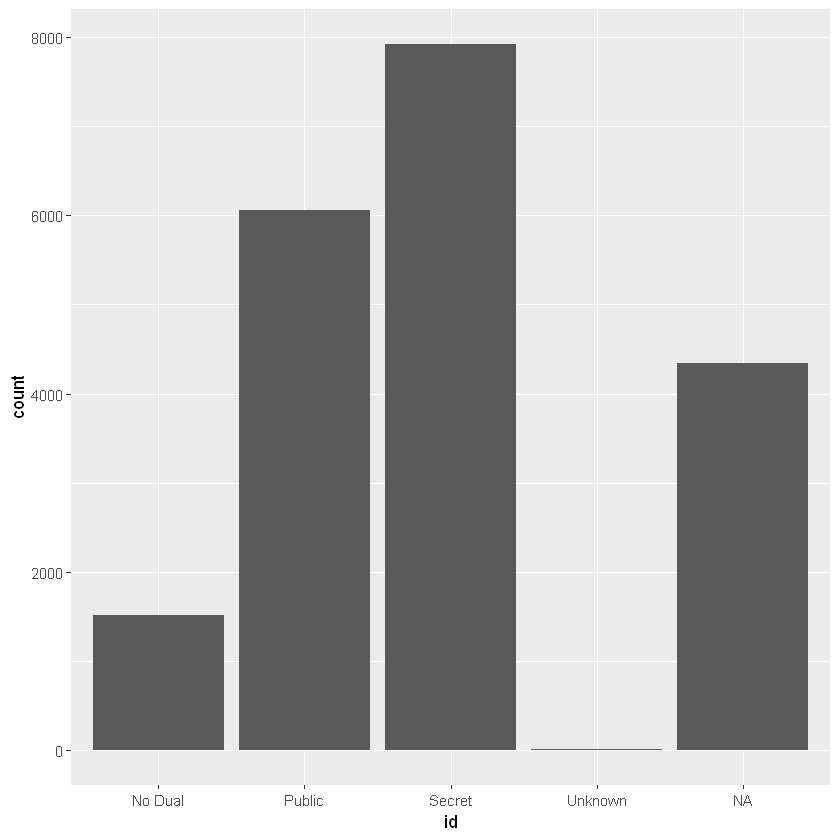

In [57]:
comics_filtered %>%
    ggplot(aes(x=id)) +
    geom_bar()

> ### Faceted barcharts

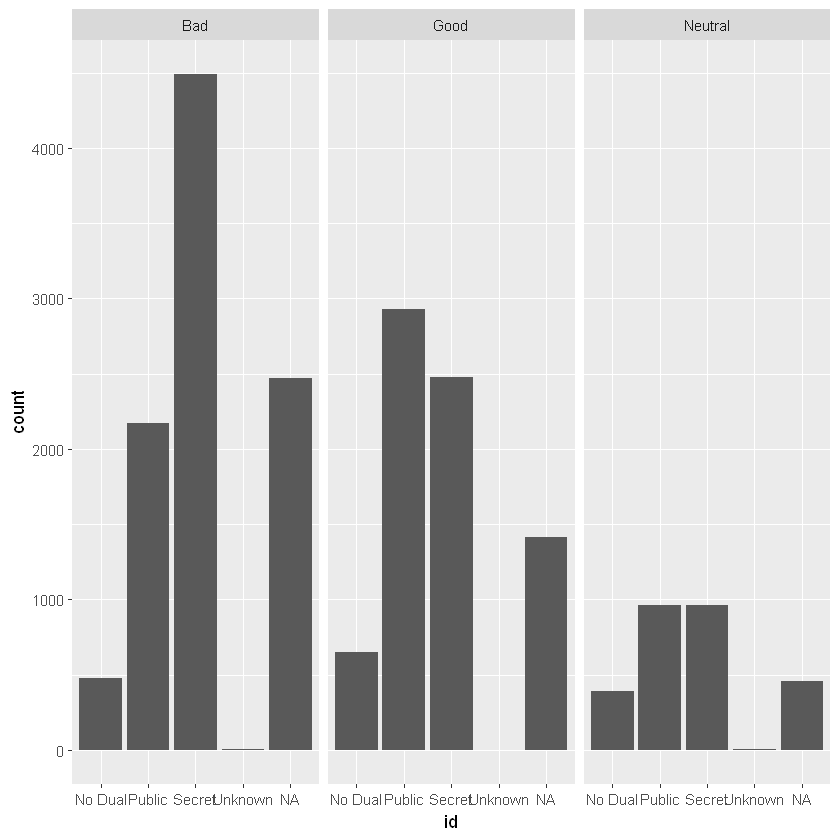

In [58]:
comics_filtered %>%
    ggplot(aes(x=id)) +
    geom_bar() +
    facet_wrap(~align)

### Marginal barchart

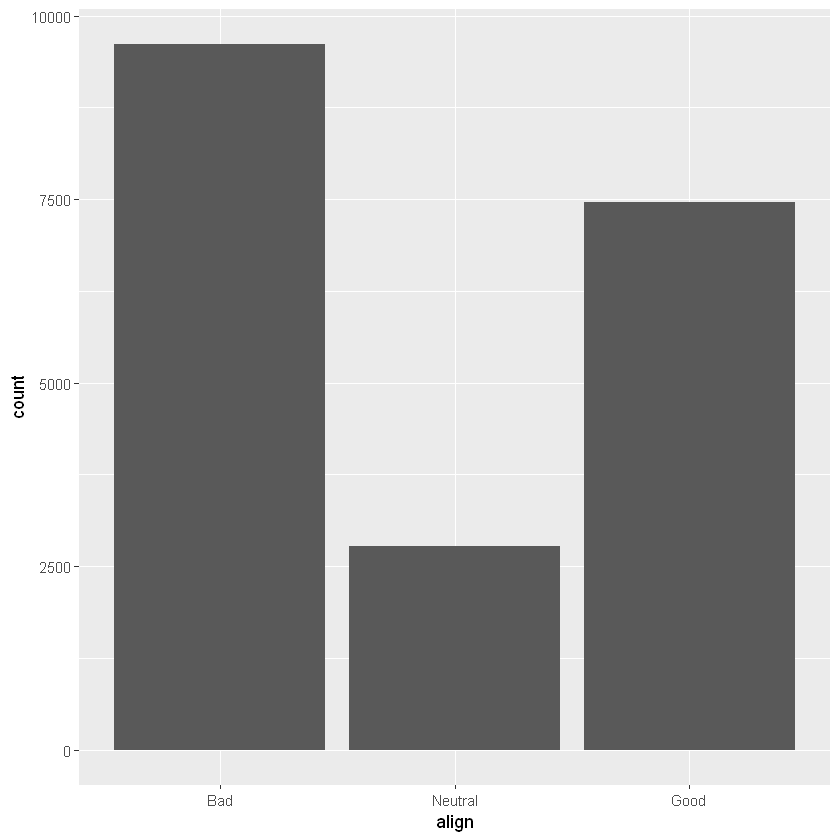

In [59]:
# Change the order of the levels in align
comics <- comics_filtered

comics$align <- factor(comics$align, 
                       levels = c("Bad", "Neutral", "Good"))

# Create plot of align
ggplot(comics, aes(x = align)) + 
  geom_bar()

### Conditional barchart

Now, if we want to break down the distribution of alignment based on gender, we're looking for conditional distributions.

We could make these by creating multiple filtered datasets (one for each gender) or by faceting the plot of alignment based on gender.

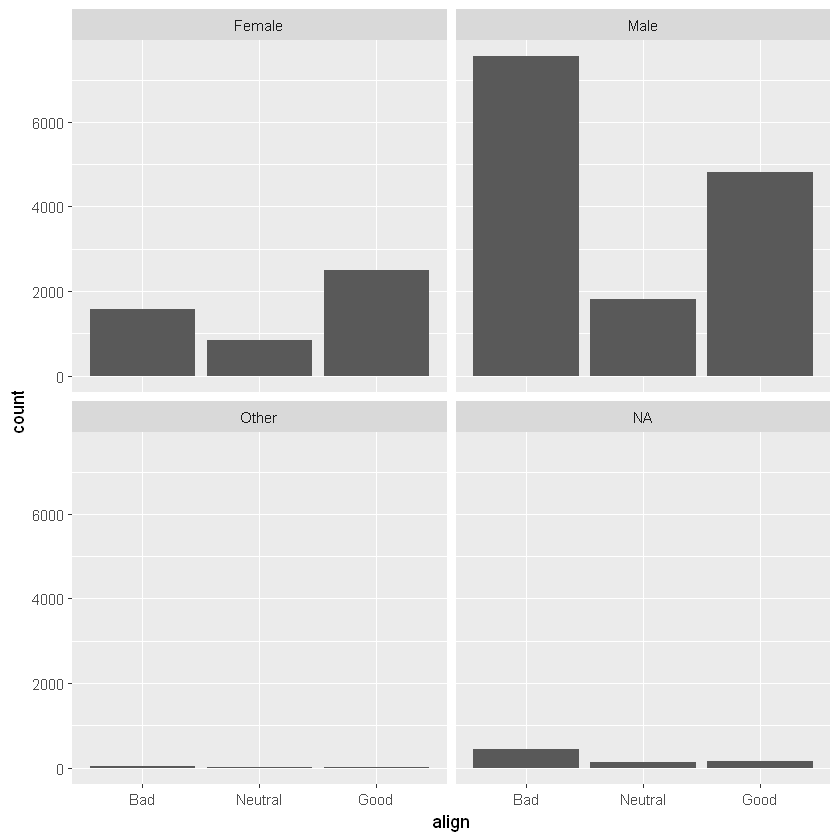

In [60]:
# Plot of alignment broken down by gender
ggplot(comics, aes(x = align)) + 
  geom_bar() +
  facet_wrap(~ gender)

### Improve piechart

The piechart is a very common way to represent the distribution of a single categorical variable, but they can be more difficult to interpret than barcharts.

# Exploring Numerical Data

We will explore how to graphically summarize numerical data.